#Project :Image Forgery Detection
##Notebook 2
###Simple Models (Feature Extraction)

#Loading Database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
#from google.colab import drive
from imageio import imread
from pylab import rcParams
import pickle
# Accessing My Google Drive
#drive.mount('/content/drive')

In [0]:
# defining global variable path
# Location of my dataset on My Google Drive
image_path = "/content/drive/My Drive/dataset-dist/phase-01/training/"
import tensorflow as tf

def loadImages(path,folder):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path,folder, file)
                          for file in os.listdir(path+folder+"/")
                          if file.endswith('.png')])
    return image_files


In [0]:
def display_one(a):
    plt.imshow(a)
    plt.xticks([]), plt.yticks([])
    plt.show()
def display(a, b, title1 = "", title2 = ""):
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


In [0]:
fakeimage = loadImages(image_path,'fake')
pristineimage = loadImages(image_path,'pristine')

##initial data shape

In [8]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))

fake images 65
pristine images 185


In [9]:
fakeimage[0:10]

['/content/drive/My Drive/dataset-dist/phase-01/training/fake/010543abfbd0db1e9aa1b24604336e0c.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/0908dafde12041540b70d688315df6e9.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/092b43f88eab0ae3ecc0eb0ccbe37c82.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/1848de26a06a7831457609429c92e2e7.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/1990a2ed067b8c537d8fe36d1ab4a7f2.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/229f447c1a26a74005b3f058201bde3f.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/237db9303fe590d8104510e36dfaa4a7.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/244a7433a307b9a2c839cefe14c0ba1d.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/2508f9cfb3c5f96d4539dcb1fa049d6a.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/fake/2680cb774242658dd33dd7dccccf6

In [0]:
pristineimage[0:10]

['/content/drive/My Drive/dataset-dist/phase-01/training/pristine/0001d52e2fd94f30c2bca0449763a752.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/000bc3906100ede4b1374cea075adedb.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/002e23c036a05de656242f5ce6ab2e15.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00d56bffe2d757a4e4625cc2d0bd0de9.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00dd93f9e4af553929e54e66c2a3186e.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00dffa8cb9db22527454bfa3c03b484b.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00e079b66d9e9f99892bbb81d9d6cd57.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00e3659be9c1fec47c739f79252840e3.png',
 '/content/drive/My Drive/dataset-dist/phase-01/training/pristine/00ec0ffe0cd029ad4551680484a007d7.png',
 '/content/drive/My Drive/dataset-dist/phase-01/trainin

##separate the masks

In [10]:
import shutil
# segregate masks from fake images
if not os.path.isdir(image_path+'fake/masks/'):
    os.mkdir(image_path+'fake/masks/')
    for fake in fakeimage:
        if fake.endswith('.mask.png'):
            shutil.move(fake, image_path+'fake/masks/')
else:
    print('Segregated already')

Segregated already


##final data shape

In [0]:
fakeimage = loadImages(image_path,'fake')
pristineimage = loadImages(image_path,'pristine')
masks = loadImages(image_path,'fake/masks')

In [12]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))
print("masks",len(masks))

fake images 65
pristine images 185
masks 65


#Preprocessing

##fake images

In [0]:
fake_shapes=[]
for fake in fakeimage:
    if imread(fake).shape in fake_shapes:
        pass
    else:
        fake_shapes.append(imread(fake).shape)

In [14]:
fake_shapes

[(1536, 2048, 4),
 (2736, 3648, 3),
 (768, 1024, 4),
 (1200, 1800, 4),
 (4288, 3216, 3),
 (2592, 1936, 3),
 (1637, 2352, 4),
 (1200, 1600, 3),
 (2976, 3968, 3),
 (3216, 4288, 3),
 (2304, 3072, 3),
 (3000, 4000, 3),
 (1944, 2592, 3),
 (4000, 3000, 3),
 (3240, 4320, 3),
 (1536, 2048, 3),
 (994, 1680, 4),
 (933, 1600, 4),
 (563, 798, 4),
 (768, 1024, 3),
 (1024, 768, 4),
 (771, 1024, 3),
 (765, 1024, 3)]

In [15]:
print('number of distinct dimensions = {}'.format(len(fake_shapes)))
heights=[]
for each in fake_shapes:
    heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in fake_shapes:
    widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in fake_shapes:
    channels.append(each[2])
print('depth of channels = {}'.format(np.unique(np.array(channels))))

number of distinct dimensions = 23
minimum height = 563
maximum height = 4288
minimum width = 768
maximum width = 4320
depth of channels = [3 4]


In [0]:
four_channel_fakes=[]
for fake in fakeimage:
    if imread(fake).shape[2]==4:
        four_channel_fakes.append(fake)
        
three_channel_fakes = [f for f in fakeimage if f not in four_channel_fakes]

In [17]:
print('Fake images with 4 channels depth = {}'.format(len(four_channel_fakes)))
print('Fake images with 3 channels depth = {}'.format(len(three_channel_fakes)))

Fake images with 4 channels depth = 12
Fake images with 3 channels depth = 53


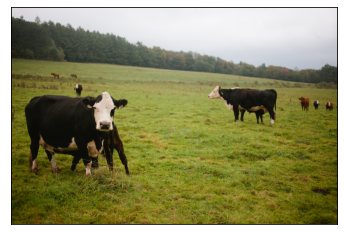

In [18]:
display_one(imread(four_channel_fakes[2]))

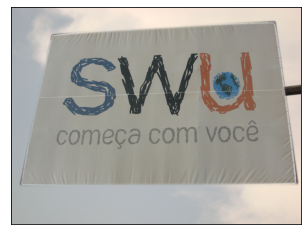

In [19]:
display_one(imread(three_channel_fakes[50]))

##masks

In [0]:
from imageio import imread
mask_shapes=[]
for mask in masks:
    if imread(mask).shape in mask_shapes:
        pass
    else:
        mask_shapes.append(imread(mask).shape)

In [21]:
mask_shapes

[(1536, 2048, 4),
 (2736, 3648, 3),
 (768, 1024, 4),
 (1200, 1800, 4),
 (4288, 3216, 3),
 (2592, 1936, 3),
 (1637, 2352, 4),
 (1200, 1600, 3),
 (2976, 3968, 3),
 (3216, 4288, 3),
 (2304, 3072, 3),
 (3000, 4000, 3),
 (1944, 2592, 3),
 (4000, 3000, 3),
 (3240, 4320, 3),
 (1536, 2048, 3),
 (994, 1680, 4),
 (933, 1600, 4),
 (563, 798, 4),
 (768, 1024),
 (1024, 768),
 (771, 1024),
 (765, 1024)]

In [22]:
print('number of distinct dimensions = {}'.format(len(mask_shapes)))
heights=[]
for each in mask_shapes:
  heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in mask_shapes:
  widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in mask_shapes:
  if(len(each)==2):
    pass
  else:
    channels.append(each[2])
CH = np.unique(np.array(channels))
print('depth of channels = {}'.format(np.append(CH,[0])))

number of distinct dimensions = 23
minimum height = 563
maximum height = 4288
minimum width = 768
maximum width = 4320
depth of channels = [3 4 0]


In [0]:
one_channel_masks=[]
for mask in masks:
    if len(imread(mask).shape)==2:
        one_channel_masks.append(mask)
three_channel_masks=[]
for mask in masks:
    img=imread(mask)
    if len(img.shape)==3 and img.shape[2]==3:
        three_channel_masks.append(mask)

four_channel_masks=[m for m in masks if ((m not in one_channel_masks) and (m not in three_channel_masks))]

In [24]:
print('Masks with 4 channels depth = {}'.format(len(four_channel_masks)))
print('Masks with 3 channels depth = {}'.format(len(three_channel_masks)))
print('Masks with 1 channels depth = {}'.format(len(one_channel_masks)))

Masks with 4 channels depth = 11
Masks with 3 channels depth = 20
Masks with 1 channels depth = 34


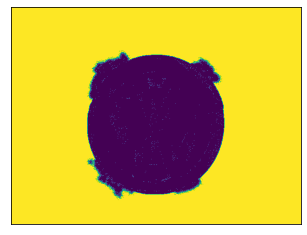

In [25]:
display_one(imread(one_channel_masks[2]))

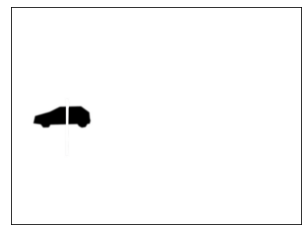

In [26]:
display_one(imread(three_channel_masks[4]))

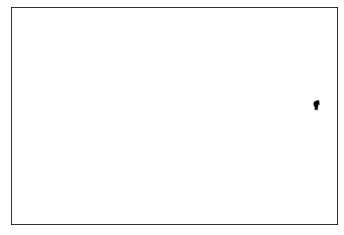

In [27]:
display_one(imread(four_channel_masks[2]))

In [28]:
from tqdm import tqdm_notebook, tqdm
i=0
for mask, fake in tqdm_notebook(zip(masks, fakeimage)):
    mask_img=imread(mask)
    fake_img=imread(fake)
    if mask_img.shape[:2]!=fake_img.shape[:2]:
        i+=1
        print(str(fake_img.shape)+' \t'+str(mask_img.shape))
        display(fake_img,mask_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


##pristine images

In [0]:
from imageio import imread
pristine_shapes=[]
for real in pristineimage:
    if imread(real).shape in pristine_shapes:
        pass
    else:
        pristine_shapes.append(imread(real).shape)

In [30]:
pristine_shapes

[(768, 1024, 3),
 (683, 1024, 3),
 (681, 1024, 3),
 (575, 1024, 3),
 (680, 1024, 3),
 (768, 1024, 4),
 (768, 1020, 3)]

In [31]:
print('number of distinct dimensions = {}'.format(len(pristine_shapes)))
heights=[]
for each in pristine_shapes:
    heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in pristine_shapes:
    widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in pristine_shapes:
    if(len(each)==2):
        pass
    else:
        channels.append(each[2])
CH = np.unique(np.array(channels))
print('depth of channels = {}'.format(np.append(CH,[0])))

number of distinct dimensions = 7
minimum height = 575
maximum height = 768
minimum width = 1020
maximum width = 1024
depth of channels = [3 4 0]


In [0]:
one_channel_pristines=[]
for real in pristineimage:
    if len(imread(real).shape)==2:
        one_channel_pristines.append(real)
three_channel_pristines=[]
for real in pristineimage:
    img=imread(real)
    if len(img.shape)==3 and img.shape[2]==3:
        three_channel_pristines.append(real)

four_channel_pristines=[m for m in pristineimage if ((m not in one_channel_pristines) and (m not in three_channel_pristines))]

In [33]:
print('Pristine images with 4 channels depth = {}'.format(len(four_channel_pristines)))
print('Pristine images with 3 channels depth = {}'.format(len(three_channel_pristines)))
print('Pristine images with 1 channels depth = {}'.format(len(one_channel_pristines)))

Pristine images with 4 channels depth = 4
Pristine images with 3 channels depth = 181
Pristine images with 1 channels depth = 0


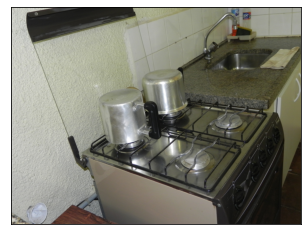

In [34]:
display_one(imread(three_channel_pristines[2]))

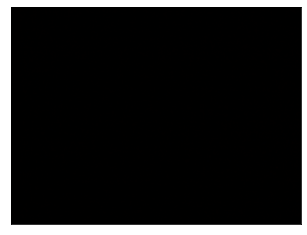

In [35]:
display_one(imread(four_channel_pristines[2]))

In [0]:
display_one(imread(one_channel_pristines[0]))

IndexError: ignored

##data cleaning

In [36]:
#featching all pristine images with 3 channels depth only
pristines_final=[]
for pristine in pristineimage:
    img=imread(pristine)
    if len(img.shape)<3:
        continue
    if img.shape[2]==4:
        continue
    pristines_final.append(pristine)
print(len(pristines_final))

181


In [37]:
#loading fake images converting all to 3 channels depth
fake_images=[]
fakes_final=[]
for fake in fakeimage:
    img=imread(fake)
    try:
        fake_images.append(img[:,:,:3])
        fakes_final.append(fake)
    except IndexError:
        print(f'image {fake} has only 1 channel')
print(len(fakes_final),len(fake_images))

65 65


In [38]:
#merging all pristines with fakes
image_names=[]
for i in range(0, len(pristines_final)):
    image_names.append(pristines_final[i])
for i in range(0, len(fakeimage)):
    image_names.append(fakes_final[i])
print(len(image_names))

246


#Train-test split

In [0]:
#labels 0 - pristine image, 1 - fake images
labels=[0]*246+[1]*65

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_names, labels, test_size=0.2, stratify=labels)

ValueError: ignored

In [0]:
print("x train",len(x_train),"x test",len(x_test))
print("y train",len(y_train),"y test",len(y_test))

NameError: ignored

#Feature engineering on Train data

In [0]:
x_train_images=[]
for x in x_train:
    img=imread(x)
    x_train_images.append(img)

In [0]:
len(x_train_images)

In [0]:
x_train_images

In [0]:
import os
x_train_mask_names=[]
for ind,x in enumerate(x_train):
    if y_train[ind]==1:
        name = os.path.split(x)[1]
        x_train_mask_names.append(name.split('.')[0]+'.mask.png')

In [0]:
x_train_mask_names[0:10]

In [0]:
x_train_fakes_names=[]
x_train_fake_images=[]
for ind, x in enumerate(x_train):
    if y_train[ind]==1:
        x_train_fakes_names.append(x)
        x_train_fake_images.append(x_train_images[ind])

In [0]:
x_train_fakes_names[0:10]

In [0]:
x_train_fake_images[0:10]

In [0]:
x_train_pristines_names=[]
x_train_pristine_images=[]
for ind, x in enumerate(x_train):
    if y_train[ind]==0:
        x_train_pristines_names.append(x)
        x_train_pristine_images.append(x_train_images[ind])

In [0]:
x_train_pristines_names[0:10]

In [0]:
x_train_pristine_images[0:10]

In [0]:
#converting all train fake images' mask to 1 channel depth
x_train_masks=[]
for m in x_train_mask_names:
    
    img=imread(image_path+'fake/masks/'+m)
    
    if len(img.shape)>2:
        img=img[:,:,0]
        
    x_train_masks.append(img)

In [0]:
x_train_masks

In [0]:
display(x_train_fake_images[0],x_train_fake_images[0][:,:,:3])

In [0]:
plt.imshow(x_train_fake_images[120], cmap='gray')

In [0]:
plt.imshow(x_train_masks[120], cmap='gray')

In [0]:
# Convert grayscale images to binary
binaries=[]

for grayscale in x_train_masks:
    blur = cv2.GaussianBlur(grayscale,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    binaries.append(th)

In [0]:
~binaries[120]

In [0]:
plt.imshow(binaries[120], cmap='gray')

In [0]:
#checkpoint
with open('x_train_masks.pickle', 'wb') as f:
    pickle.dump(x_train_masks, f)
with open('x_train_fakes_names.pickle', 'wb') as f:
    pickle.dump(x_train_fakes_names, f)
with open('x_test.pickle', 'wb') as f:
     pickle.dump(x_test, f)
with open('y_test.pickle', 'wb') as f:
     pickle.dump(y_test, f)

In [0]:
with open('x_train_masks.pickle', 'rb') as f:
    x_train_masks = pickle.load(f)
with open('x_train_fakes_names.pickle', 'rb') as f:
    x_train_fakes_names = pickle.load(f)
with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [0]:
np.save('x_train_masks.npy',np.array(x_train_masks))

In [0]:
np.save('x_train_fakes_names.npy',np.array(x_train_fakes_names))

In [0]:
np.save('x_train_fake_images.npy',np.array(x_train_fake_images))

In [0]:
np.save('x_test.npy',np.array(x_test))

In [0]:
np.save('y_test.npy',np.array(y_test))

In [0]:
np.save('x_train_pristines_names.npy',np.array(x_train_pristines_names))

In [0]:
np.save('x_train_pristine_images.npy',np.array(x_train_pristine_images))

In [0]:
x_train_pristines_names=np.load('x_train_pristines_names.npy')

In [0]:
x_train_pristine_images=np.load('x_train_pristine_images.npy',allow_pickle=True)

##Fake Grayscale Samples

In [0]:
def count_255(mask):
    i=0
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]==255:
                i+=1
    return i

In [0]:
def sample_fake(img, mask):
    kernel_size=64
    stride=32
    
    samples=[]
    
    for y_start in range(0, img.shape[0]-kernel_size+1, stride):
        for x_start in range(0, img.shape[1]-kernel_size+1, stride):
            
            c_255=count_255(mask[y_start:y_start+kernel_size, x_start:x_start+kernel_size])
            
            if (c_255>1600) and (kernel_size*kernel_size-c_255>1600):
                samples.append(img[y_start:y_start+kernel_size, x_start:x_start+kernel_size, :3])    
        
    return samples

In [0]:
Sample=sample_fake(x_train_fake_images[5], x_train_masks[5])

In [0]:
len(Sample)

In [0]:
x_train_fake_images[5].shape

In [0]:
x_train_masks[5].shape

In [0]:
display(x_train_fake_images[5],x_train_masks[5])

In [0]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [0]:
plt.imshow(Sample[0])

In [0]:
plt.imshow(Sample[1])

In [0]:
plt.imshow(Sample[2])

In [0]:
plt.imshow(Sample[3])

In [0]:
plt.imshow(Sample[3])

In [0]:
plt.imshow(Sample[4])

In [0]:
plt.imshow(Sample[5])

In [0]:
plt.imshow(Sample[5])

In [0]:
plt.imshow(Sample[6])

In [0]:
len(x_train_fake_images)

In [0]:
x_train_fake_images=np.load('x_train_fake_images.npy',allow_pickle=True)

In [0]:
samples_fake=[]
i=0
j=0
for fake, mask in zip(x_train_fake_images, x_train_masks):
    image_samples=sample_fake(fake, mask)
    for sample in image_samples:
        samples_fake.append(sample)
        i+=1
        print(i,"th sample processed")
    j+=1
    print(j,"th image processed")

In [0]:
print (len(samples_fake))
plt.imshow(samples_fake[0])

In [0]:
    samples_fake_np = samples_fake[0][np.newaxis, :, :, :]
    for fake_sample in samples_fake[1:]:
        samples_fake_np = np.concatenate((samples_fake_np, fake_sample[np.newaxis, :, :, :3]), axis=0)

    print('done')
    np.save('sample_fakes_np.npy', samples_fake_np)

In [0]:
print (len(samples_fake_np))
plt.imshow(samples_fake_np[0])

##Fake Binary samples

In [0]:
from multiprocessing import Process, Manager
from imageio import imread
import pickle
import numpy as np
import os
import cv2

fake_path = image_path+'fake/'
pristine_path =  image_path+'pristine/'
mask_path = fake_path + 'masks/'

def count_255(mask):
    i=0
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]==255:
                i+=1
    return i

def sample_fake(img, mask):
    kernel_size = 64
    stride = 8
    threshold=1024

    samples = []

    for y_start in range(0, img.shape[0] - kernel_size + 1, stride):
        for x_start in range(0, img.shape[1] - kernel_size + 1, stride):

            c_255 = count_255(mask[y_start:y_start + kernel_size, x_start:x_start + kernel_size])

            if (c_255 > threshold) and (kernel_size * kernel_size - c_255 > threshold):
                samples.append(img[y_start:y_start + kernel_size, x_start:x_start + kernel_size, :3])

    return samples

In [0]:
samples_fake_binaries=[]
i=0
j=0
for fake, mask in zip(x_train_fake_images, binaries):
    image_samples=sample_fake(fake, mask)
    for sample in image_samples:
        samples_fake_binaries.append(sample)
        i+=1
        print(i,"th sample processed")
    j+=1
    print(j,"th image processed")

In [0]:
np.save('sample_fakes_binaries_np.npy', samples_fake_binaries_np)

In [0]:
samples_fake = np.load('sample_fakes_np.npy')

In [0]:
fake_samples_grayscale = len(samples_fake)
fake_samples_binary = len(samples_fake_binaries)

In [0]:
print(f'we have {fake_samples_grayscale} fake samples each of shape 64 * 64 using grayscale masks')
print(f'we have {fake_samples_binary} fake samples each of shape 64 * 64 using binary masks')

In [0]:
with open('sample_fakes_binaries_np.pickle', 'wb') as f:
    pickle.dump(samples_fake_binaries_np, f)
with open('sample_fakes_np.pickle', 'wb') as f:
    pickle.dump(samples_fake_np, f)

In [0]:
with open('sample_fakes_binaries_np.pickle', 'rb') as f:
    sample_fakes_binaries_np = pickle.load(f)

In [0]:
with open('sample_fakes_np.pickle', 'rb') as f:
    samples_fake__np = pickle.load(f)

##Pristine Random Samples

In [0]:
def sample_random(img, num_samples, stride=8):
    kernel_size=64
    
    x_start=0
    y_start=0
    samples=[]
    
    for y_start in range(0, img.shape[0] - kernel_size + 1, stride):
        for x_start in range(0, img.shape[1] - kernel_size + 1, stride)
            samples.append(img[y_start:y_start + kernel_size, x_start:x_start + kernel_size, :3])
    
    indices=np.random.randint(0, len(samples), min(len(samples), num_samples))
    
    sampled=[]
    for i in indices:
        sampled.append(samples[i])
    
    return sampled

In [0]:
print("Number of pristine train images",len(x_train_pristine_images))
print("Number of fake train images",len(x_train_fake_images))

In [0]:
y=fake_samples_binary/len(x_train_pristine_images)
y

In [0]:
z = len(x_train_pristine_images)*math.floor(y)
z

In [0]:
#fetch y (ceil or floor) samples from pristine image
samples_pristine_binary=np.ndarray(shape=(z, 64, 64, 3), dtype=np.dtype('uint8'))

i=0
for pristine_img in x_train_pristine_images:
    
    samples=sample_random(pristine_img, math.floor(y))
    for j, sample in enumerate(samples):
        samples_pristine_binary[i, :, :, :]=sample
        i+=1
print(i)

In [0]:
train_labels_binary=[0]*len(samples_pristine_binary)+[1]*len(samples_fake_binaries)

In [0]:
np.save('samples_pristine_grayscale',samples_pristine_grayscale)

In [0]:
np.save('samples_fake_grayscale',samples_fake_grayscale)

In [0]:
np.save('train_labels_grayscale',train_labels_grayscale)

In [0]:
np.save('samples_pristine_binary',samples_pristine_binary)

In [0]:
np.save('samples_fake_binary',samples_fake_binaries)

In [0]:
np.save('train_labels_binary',train_labels_binary)

#final data shape

In [0]:
# Concatenate authentic and fake image samples along axis=0 to generate train set for binary sampled images
train_data_binary = np.concatenate((samples_pristine_binary, samples_fake_binaries), axis=0)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(train_data_binary, train_labels_binary, test_size=0.3, stratify = train_labels_binary)

In [0]:
np.save('x_train',x_train)

In [0]:
np.save('y_train',y_train)

In [0]:
np.save('x_cv',x_cv)

In [0]:
np.save('y_cv',y_cv)

In [0]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print('x_validation',x_cv)

#CNN model

In [0]:
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten,Dropout,MaxPool2D,Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping
import numpy as np

In [0]:
#normalise the training data
x_train = x_train/255    

In [0]:
 x_cv = x_cv/255

In [0]:
        #reducing the data size of training and testing
        x_train=np.load('x_train_normalised.npy')
        x_cv=np.load('x_cv_normalised.npy')

        y_train=np.load('y_train.npy')
        y_cv=np.load('y_cv.npy')
        x_train = x_train[0:50000]
        x_cv = x_cv[0:15000]
        y_train = y_train[0:50000]
        x_cv = x_cv[0:15000]

In [0]:
y_cv = np.load('y_cv.npy')
y_cv = y_cv[0:15000]

In [0]:
x_cv = np.load('x_cv_normalised.npy')
x_cv = x_cv[0:15000]

In [0]:
x_cv.shape

In [0]:
x_cv = np.array(x_cv)

In [0]:
y_cv = np.array(y_cv)

In [0]:
x_cv.shape

In [0]:
y_cv.shape

In [0]:
x_train.shape

In [0]:
np.unique(y_train,  return_counts=True)

##Model

In [0]:
    cnn_model=Sequential()

    cnn_model.add(Conv2D(input_shape=(64, 64, 3), filters=20, kernel_size=4, strides=2, padding='valid',
                         activation='relu',  data_format='channels_last'))

    cnn_model.add(Conv2D(filters=15, kernel_size=3, strides=1, padding='valid', activation='relu',
                          data_format='channels_last'))

    cnn_model.add(MaxPool2D(pool_size=3, data_format='channels_last'))

    cnn_model.add(Conv2D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu',
                          data_format='channels_last'))

    cnn_model.add(MaxPool2D(pool_size=2, data_format='channels_last'))
    cnn_model.add(Flatten())

    cnn_model.add(Dropout(0.2))

    cnn_model.add(Dense(1, activation='sigmoid'))

    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    cnn_model.summary()
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    batch_size=16
    epochs=100
    history = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                            validation_data=(x_cv, y_cv))

    cnn_model.save('keras_cnn_model_redone_ex2.hdf5')

In [0]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [0]:
print(x_test.shape,y_test.shape)

In [0]:
np.unique(y_cv,return_counts=True)

In [0]:
np.unique(y_train,return_counts=True)

In [0]:
plt.imshow(x_images[1])

In [0]:
x_cv.shape

In [0]:
import cv2
#from google.colab.patches import cv2_imshow
x_t = []
for x in x_test:
    img = imread(x)
    img = img[:,:,:3]
    #print('Original Dimensions : ',img.shape)
    #scale_percent = 60 # percent of original size
    width = 64
    height =64
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #resized.tolist()
    x_t.append(resized)
#print('Resized Dimensions : ',resized.shape)

In [0]:
plt.imshow(x_t[1])

In [0]:
x_test = np.array(x_t)

In [0]:
#normalise the test data
x_test = x_test/255

##evaluation

In [0]:
y_pred_cnn = cnn_model.predict_classes(x_cv)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

In [0]:
plot_roc(y_pred_cnn,y_cv)

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.68,0.66]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in CNN')
 
plt.show()

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

#history=load_model(image_path+'keras_cnn_model.hdf5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
pred = [x for [x] in y_pred_cnn]
chart_regression(pred[0:50],y_cv[0:50])

In [0]:
#TRANSFER LEARNING
score_lr1

In [0]:
#CNN
score_lr2

In [0]:
pred = [x for [x] in y_pred_cnn]
chart_regression(pred[0:50],y_cv[0:50])

In [0]:
model = load_model(fine_tuned_model_adam_weights.hdf5)

#Transfer Learning

In [0]:
import keras
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from keras import optimizers

vgg_model=VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))

model_aug=Sequential()
model_aug.add(vgg_model)

top_model=Sequential()
top_model.add(Flatten(input_shape=(2, 2, 512)))
#model_aug.add(Dropout(0.3))
top_model.add(Dense(64, activation='relu'))
	
top_model.add(Dense(1, activation='sigmoid'))
#top_model.load_weights('top_model_full_data_custom_lr_weights.h5')

model_aug.add(top_model)
	

for layer in model_aug.layers[0].layers[:17]:
	layer.trainable=False

model_aug.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-6), metrics=['accuracy'])

print(model_aug.summary())

model_aug.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_cv, y_cv), verbose=1)
model_aug.save_weights('fine_tuned_model_adam_ex1.hdf5')
with open(image_path+'model_architecture_ex1.json', 'w') as f:
    f.write(model_aug.to_json())

In [0]:
from keras.models import model_from_json
json_file = open(image_path+'model_architecture_ex1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fine_tuned_model_adam_ex1.hdf5")

In [0]:
y_pred_cnn = loaded_model.predict_classes(x_cv)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['pristine','fake'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Fake', 'Pristine')
y_pos = np.arange(len(objects))
performance = [0.77,0.77]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score for fake and Pristine images in Transfer Learning')
 
plt.show()

In [0]:
plot_roc(y_pred_cnn,y_cv)

#Model Comparison

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Transfer Learning', 'CNN')
y_pos = np.arange(len(objects))
performance = [score_lr1,score_lr2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparision')
 
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.68,0.77 )
p = (0.66, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.5395,0.67)
p = (0.5692, 0.77)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Without Feature Extraction')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='With Feature Extraction')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score comparison with and without feature extraction')
plt.xticks(index, ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

#Test 3 new images

In [0]:
np.save('Data/x_train.npy',x_train)
np.save('Data/y_train.npy',y_train)
np.save('Data/x_cv.npy',x_cv)
np.save('Data/y_cv.npy',y_cv)
np.save('Data/x_test.npy',x_test)
np.save('Data/y_test.npy',y_test)

In [0]:
x_test

In [0]:
y_test

In [0]:
plt.imshow(x_test[0])

In [0]:
plt.imshow(x_test[3])

In [0]:
plt.imshow(x_test[46])

In [0]:
ex1 = (x_test[0]).reshape(1,64,64,3)
pred_cnn_ex1 =  cnn_model.predict_classes(ex1)
ex2 = (x_test[3]).reshape(1,64,64,3)
pred_cnn_ex2 =  cnn_model.predict_classes(ex2)
ex6 = (x_test[46]).reshape(1,64,64,3)
pred_cnn_ex6 =  cnn_model.predict_classes(ex6)

In [0]:
pred_ex1 = loaded_model.predict_classes(ex1)
pred_ex2 = loaded_model.predict_classes(ex2)
pred_ex6 = loaded_model.predict_classes(ex6)

In [0]:
pred_ex1 #1

In [0]:
pred_ex2 #0

In [0]:
pred_ex6 #1

In [0]:
y_test